##  Circuit simulation: basics
We explain how define a circuit and simulate its behaviour by using one of the avaliable simulators: AerSimulator.

In [1]:
#Import the necessary libraries
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

### Circuit definition step by step

c:\Users\admin\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: c:\Users\admin\anaconda3\Lib\site-packages\qiskit\visualization\circuit\styles\iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


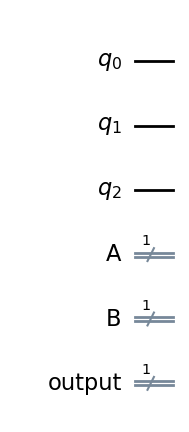

In [2]:
# Create a quantum circuit with 3 qubits 
circ = QuantumCircuit(3, 0)
# Create 3 classical register and label them for improved clarity
A_reg = ClassicalRegister(1, 'A')
B_reg = ClassicalRegister(1, 'B')
output = ClassicalRegister(1, 'output')
circ.add_register(A_reg)
circ.add_register(B_reg)
circ.add_register(output)
circ.draw(output='mpl', style='iqx')

C:\Users\admin\AppData\Local\Temp\ipykernel_17664\1155327143.py:10: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  circ.h(2).c_if(B_reg, 1)
C:\Users\admin\AppData\Local\Temp\ipykernel_17664\1155327143.py:11: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  circ.y(2).c_if(A_reg, 1)


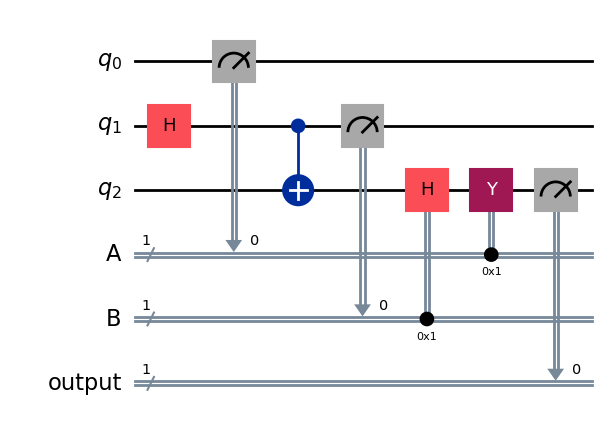

In [3]:
# Create an entangled pair of qubits (Bell pair)
circ.h(1)
circ.cx(1, 2)

# Measure the first two qibits and store the results in the defined classical registers
circ.measure(0, A_reg)
circ.measure(1, B_reg)

# Apply a gate conditioned to a classical register output
circ.h(2).c_if(B_reg, 1)
circ.y(2).c_if(A_reg, 1)

circ.measure(2, output)
circ.draw(output='mpl', style='iqx')

### Simulation

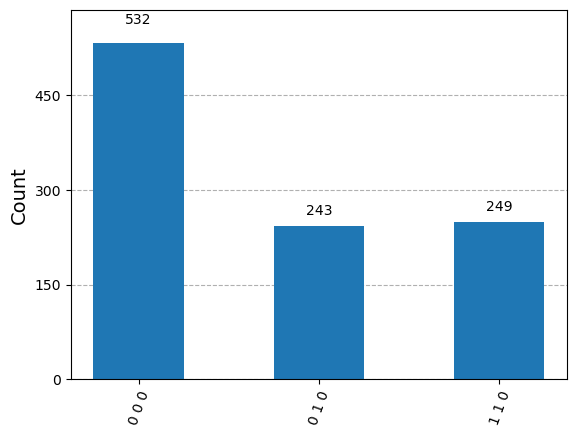

In [4]:
# execute the quantum circuit on the Aer simulator (ideal simulated quantum computer)
nShots = 1024
idealSim = AerSimulator()
result_ideal = idealSim.run(circ, shots=nShots).result()
counts  = result_ideal.get_counts(circ)
plot_histogram(counts)